<a href="https://colab.research.google.com/github/msrepo/ml-mscise-2023/blob/master/model_evaluation/model_eval_kfold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original notebook by: **Sebastian Raschka**

## Model Evaluation, Model Selection and Algorithm Selection
https://github.com/rasbt/model-eval-article-supplementary

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn.apionly as sns

**Resampling and Distributions**

In [ ]:
rng = np.random.RandomState(12345)

gauss = rng.multivariate_normal(mean=np.array([0.,0.]),
                                cov=np.array([[2., 1.],
                                              [1., 2.]]),
                                size=100)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


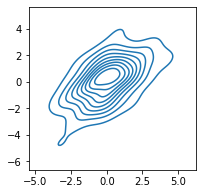

In [ ]:
fig = plt.figure(figsize=(3,3))
ax  = fig.add_subplot(111)
sns.kdeplot(gauss[:,0], gauss[:,1])


### Holdout method and repeated sampling

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X, y = iris.data[:,:], iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
                                                    random_state=1,
                                                    stratify=y)
clf_1 = KNeighborsClassifier(n_neighbors=3,
                             weights='uniform',
                             algorithm='kd_tree',
                             leaf_size=30,
                             p=2,
                             metric='minkowski',
                             metric_params=None,
                             )

In [ ]:
rng = np.random.RandomState(seed=12345)
seeds = np.arange(10**5)
rng.shuffle(seeds)
seeds = seeds[:50]

pred_2 = []
for i in seeds:
  X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      test_size=0.5,
                                                      random_state=i,
                                                      stratify=y)
  y_pred_i = clf_1.fit(X_train, y_train).predict(X_test)
  y_pred_i_acc = np.mean(y_test == y_pred_i)
  pred_2.append(y_pred_i_acc)

pred_2 = np.asarray(pred_2)
print(pred_2.mean())

0.9544


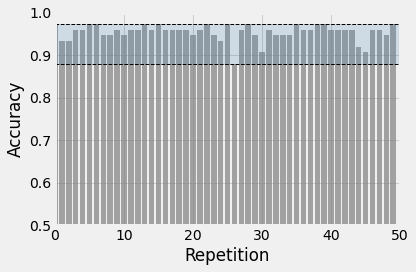

In [ ]:
with plt.style.context(('fivethirtyeight')):
  plt.bar(range(0, pred_2.shape[0]), pred_2, color='gray', alpha=0.7)
  plt.axhline(pred_2.max(), color='k', linewidth=1, linestyle='--')
  plt.axhline(pred_2.min(), color='k', linewidth=1, linestyle='--')
  plt.axhspan(pred_2.min(), pred_2.max(), alpha=0.2, color='steelblue')
  plt.xlabel('Repetition')
  plt.ylabel('Accuracy')
  plt.xlim([0,pred_2.shape[0]])
  plt.ylim([0.5, 1.0])
  plt.tight_layout()

In [ ]:
rng = np.random.RandomState(seed=12345)
seeds = np.arange(10**5)
rng.shuffle(seeds)
seeds = seeds[:50]

pred_2 = []
for i in seeds:
  X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      test_size=0.1,
                                                      random_state=i,
                                                      stratify=y)
  y_pred_i = clf_1.fit(X_train, y_train).predict(X_test)
  y_pred_i_acc = np.mean(y_test == y_pred_i)
  pred_2.append(y_pred_i_acc)

pred_2 = np.asarray(pred_2)
print(pred_2.mean())

0.9613333333333334


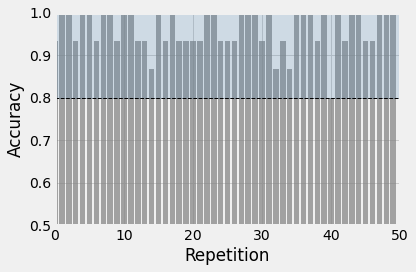

In [ ]:
with plt.style.context(('fivethirtyeight')):
  plt.bar(range(0, pred_2.shape[0]), pred_2, color='gray', alpha=0.7)
  plt.axhline(pred_2.max(), color='k', linewidth=1, linestyle='--')
  plt.axhline(pred_2.min(), color='k', linewidth=1, linestyle='--')
  plt.axhspan(pred_2.min(), pred_2.max(), alpha=0.2, color='steelblue')
  plt.xlabel('Repetition')
  plt.ylabel('Accuracy')
  plt.xlim([0,pred_2.shape[0]])
  plt.ylim([0.5, 1.0])
  plt.tight_layout()

**Pessimistic Bias in Holdout**

In [ ]:
%%capture
!pip install mlxtend

In [ ]:
from mlxtend.data import mnist_data

x2, y2 = mnist_data()
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, 
                                                        test_size=0.3,
                                                        random_state=12,
                                                        stratify=y2)


In [ ]:
from sklearn.linear_model import LogisticRegression

clf_2 = LogisticRegression(penalty='l2',
                           dual=False,
                           tol=1e-4,
                           C=1e-6,
                           fit_intercept=True,
                           intercept_scaling=1,
                           class_weight=None,
                           random_state=12,
                           max_iter=1000,
                           solver='lbfgs',
                           multi_class='multinomial',
                           verbose=0,
                           warm_start=False,
                           n_jobs=1
                           )

pred_train, pred_test = [], []

intervals = np.arange(500, X_train2.shape[0] + 1, 200)

for i in intervals:
  clf_2.fit(X_train2[:i], y_train2[:i])
  p_train = clf_2.score(X_train2[:i], y_train2[:i])
  p_test = clf_2.score(X_test2, y_test2)
  pred_train.append(p_train)
  pred_test.append(p_test)

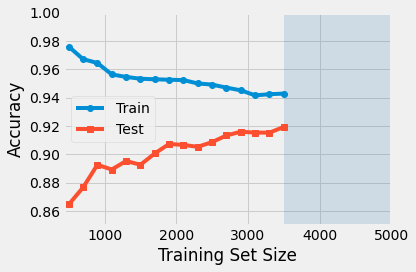

In [ ]:
with plt.style.context(('fivethirtyeight')):
    plt.plot(intervals, pred_train, marker='o', label='Train')
    plt.plot(intervals, pred_test, marker='s', label='Test')
    plt.legend(loc='best', numpoints=1)
    plt.xlim([430, X_train2.shape[0] + X_test2.shape[0]])
    plt.axvspan(X_train2.shape[0], 
                X_train2.shape[0] + X_test2.shape[0], 
                alpha=0.2, 
                color='steelblue')
    plt.ylim([0.85, 1.0])
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.tight_layout()

**Bootstrap**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

rng = np.random.RandomState(seed=12345)

iris = load_iris()
X, y = iris.data, iris.target

clf = KNeighborsClassifier(n_neighbors=3,
                           weights='uniform',
                           algorithm='kd_tree',
                           leaf_size=30,
                           p=2,
                           metric='minkowski',
                           metric_params=None,
                           n_jobs=1)
idx = np.arange(y.shape[0])

accuracies = []

for i in range(200):
  train_idx = rng.choice(idx, size=idx.shape[0], replace=True)
  test_idx = np.setdiff1d(idx, train_idx, assume_unique=False)
  
  boot_train_X, boot_train_y = X[train_idx], y[train_idx]
  boot_test_X, boot_test_y = X[test_idx], y[test_idx]

  clf.fit(boot_train_X, boot_train_y)
  acc = clf.score(boot_test_X, boot_test_y)
  accuracies.append(acc)

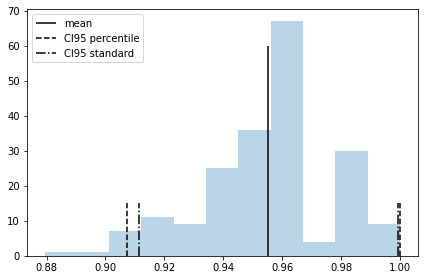

In [ ]:
mean  = np.mean(accuracies)
sigma = np.sqrt( (1. / (200 - 1)) * np.sum([(acc-mean)**2 for acc in accuracies]))
ci = 1.97 * sigma

lower = np.percentile(accuracies, 2.5)
upper = np.percentile(accuracies, 97.5)

fig, ax = plt.subplots()
ax.hist(accuracies,bins=11,edgecolor='none',alpha=0.3)
ax.vlines(mean, [0], 60, linestyle='-', label='mean')
ax.vlines(lower,[0],15,linestyle='--',label='CI95 percentile')
ax.vlines(upper, [0], 15, linestyle='--')

ax.vlines(mean + ci, [0], 15, linestyle='-.',label='CI95 standard')
ax.vlines(mean - ci, [0], 15, linestyle='-.')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**K-fold and standard deviation (1-standard error method)**

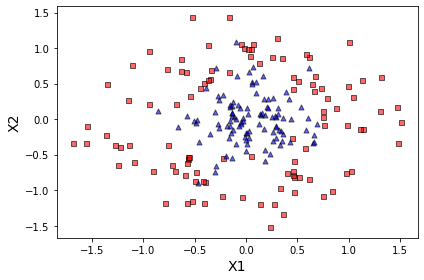

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=300, random_state=1, noise=0.275, factor=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=12345,
                                                    stratify=y)
plt.scatter(X_train[y_train==0,0], X_train[y_train==0, 1],
            marker='s',color='red',edgecolor='k',alpha=0.6,s=25)
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1],
            marker='^',color='blue',edgecolor='k',alpha=0.6,s=25)
plt.xlabel('X1',fontsize=14)
plt.ylabel('X2',fontsize=14)
plt.tight_layout()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

params = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
cv_acc, cv_std, = [], []

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

for c in params:
  clf = SVC(C=10.0, kernel='rbf', degree=1, gamma=c, coef0=0.0,
            shrinking=True, probability=False, tol=1e-3, cache_size=200,
            class_weight=None, verbose=False, random_state=0)
  
  all_acc = []
  for train_index, valid_index in cv.split(X_train,y_train):
    pred = clf.fit(X_train[train_index], y_train[train_index])\
            .predict(X_train[valid_index])
    acc = np.mean(y_train[valid_index] == pred)
    all_acc.append(acc)
  
  all_acc = np.array(all_acc)
  y_pred_cv_mean = all_acc.mean()
  y_pred_cv_std = all_acc.std()

  cv_acc.append(y_pred_cv_mean)
  cv_std.append(y_pred_cv_std)

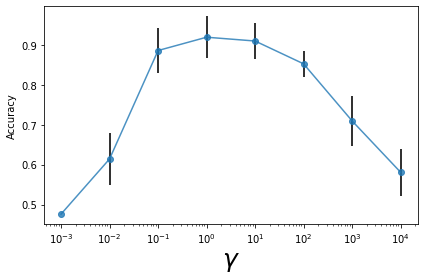

In [ ]:
ax = plt.subplot(111)
ax.set_xscale('log')
ax.errorbar(params, cv_acc, yerr=cv_std, marker='o', alpha=0.8,
            ecolor='black', elinewidth=2)
plt.xlabel('$\gamma$',fontsize=25)
plt.ylabel('Accuracy')
plt.tight_layout()